# <center> <h1>  🐦‍⬛️🦅🦆  👨‍💻 🦆🦅 🐦‍⬛️

### <center> When working with deep learning, we sometimes have a small dataset. We know that the more data the better for deep learning. But what can we do if we have little information? In this case, we can make various changes to the information we have. That is, we can artificially increase the volume of our data, rotate it, warp it, add noise to it, and this is very useful for us in increasing the data. Why is this necessary? We don't always have the same data, for example, when finding the number 3, we teach it only the straight number 3. During the test, if it comes across a crooked number 3, our model does not recognize it, so we use different images. changes will lead to very good results and it will also help to avoid overfitting.

<center> 

# 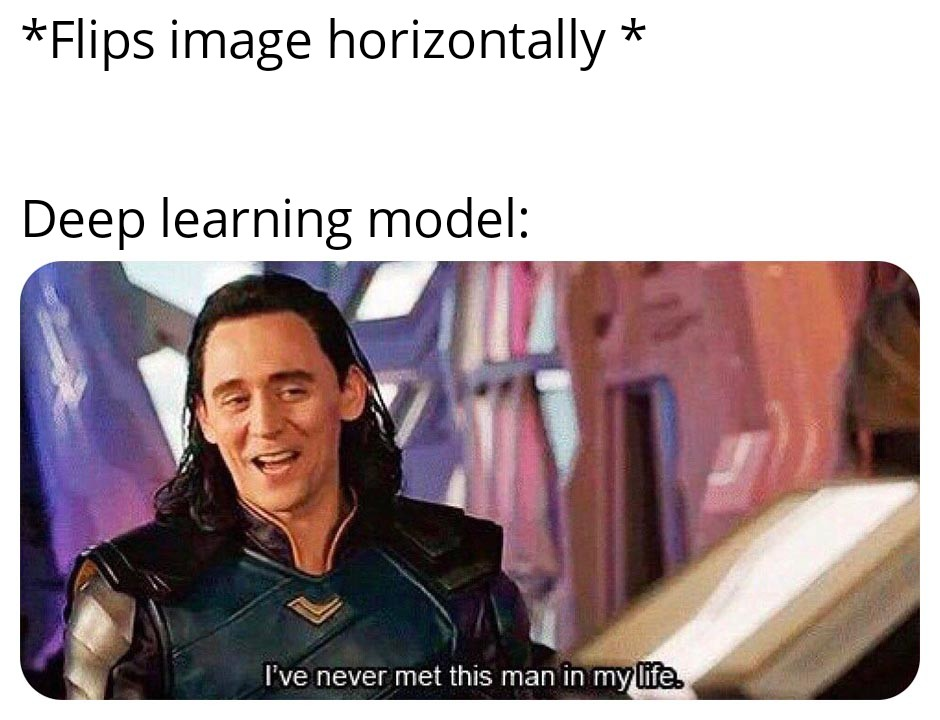

In [19]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_data_dir = "Datasets/birds/train"
test_data_dir = "Datasets/birds/test"

# <center> Without Data Augmentation
    

In [21]:
train_data_no_augmentatsiya = image_dataset_from_directory(train_data_dir, image_size=(224,224), batch_size=16)
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224), batch_size=16)

Found 1582 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


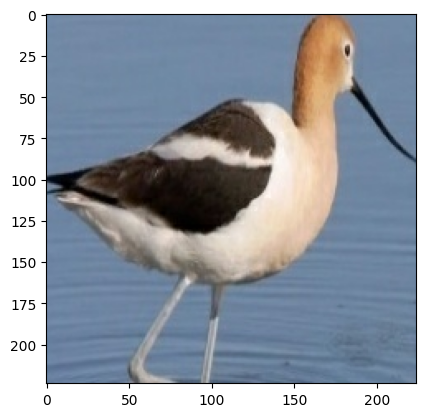

In [22]:
plt.imshow(list(train_data_no_augmentatsiya)[0][0][0].numpy().astype("uint8"))

In [23]:
classes = train_data_no_augmentatsiya.class_names
classes

['ABBOTTS BABBLER',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN COOT']

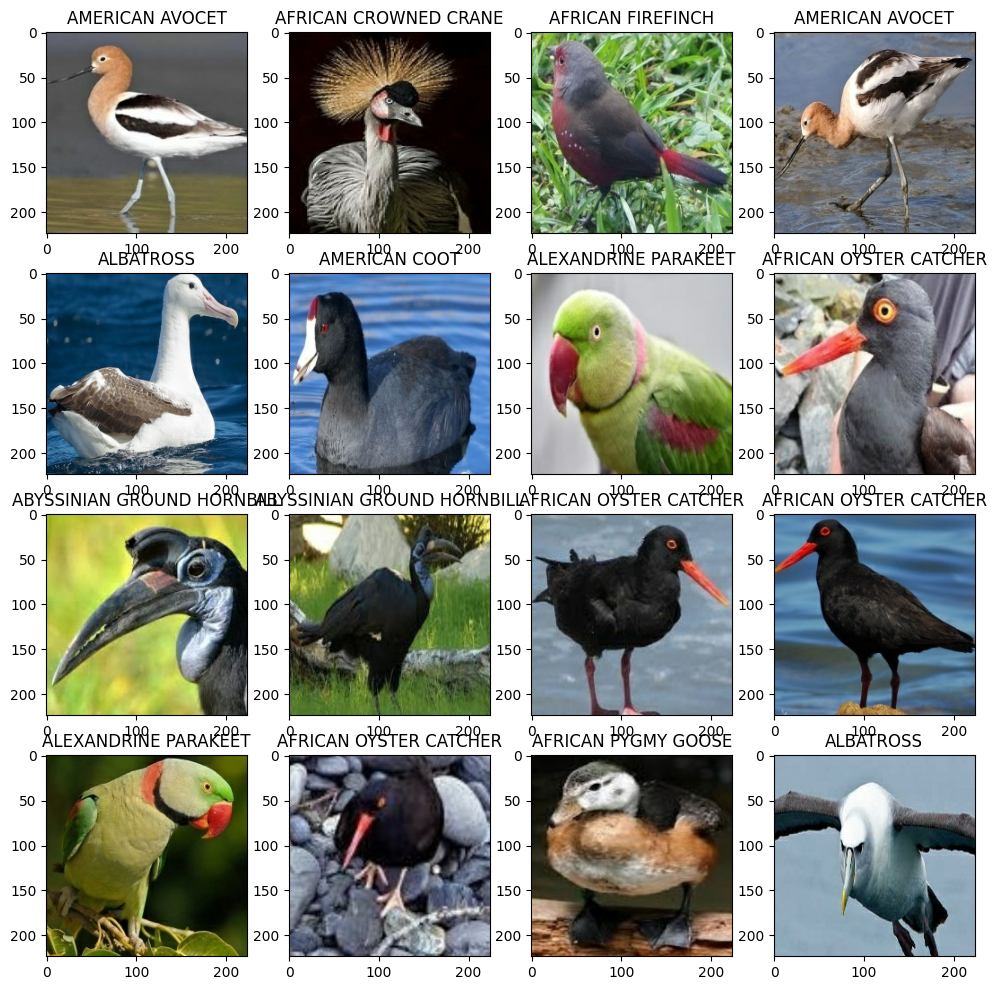

In [24]:
plt.figure(figsize=(12,12))
for image, label in train_data_no_augmentatsiya.take(1):
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.title(classes[label[i]])
        plt.imshow(image[i].numpy().astype("uint8"))

In [25]:
model_without_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((224,224,3)),
    
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),   #112x112x32
    
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),   #56x56x64
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    
])

In [26]:
model_without_augmentation.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [27]:
model_without_augmentation.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [28]:
with tf.device('/GPU:0'):
    model_without_augmentation.fit(train_data_no_augmentatsiya, epochs=10) 

Epoch 1/10
99/99 [==============================] - 8s 59ms/step - loss: 109.9955 - accuracy: 0.2838
Epoch 2/10
99/99 [==============================] - 6s 60ms/step - loss: 0.8874 - accuracy: 0.7389
Epoch 3/10
99/99 [==============================] - 6s 60ms/step - loss: 0.2753 - accuracy: 0.9298
Epoch 4/10
99/99 [==============================] - 6s 60ms/step - loss: 0.1215 - accuracy: 0.9716
Epoch 5/10
99/99 [==============================] - 6s 60ms/step - loss: 0.2370 - accuracy: 0.9526
Epoch 6/10
99/99 [==============================] - 6s 60ms/step - loss: 0.1595 - accuracy: 0.9646
Epoch 7/10
99/99 [==============================] - 6s 60ms/step - loss: 0.0838 - accuracy: 0.9855
Epoch 8/10
99/99 [==============================] - 6s 60ms/step - loss: 0.0973 - accuracy: 0.9823
Epoch 9/10
99/99 [==============================] - 6s 60ms/step - loss: 0.0630 - accuracy: 0.9848
Epoch 10/10
99/99 [==============================] - 6s 60ms/step - loss: 0.0195 - accuracy: 0.9962


In [29]:
model_without_augmentation.evaluate(test_data)

4/4 [==============================] - 1s 128ms/step - loss: 8.6249 - accuracy: 0.4400


[8.624942779541016, 0.4399999976158142]

# <center> With Data Augmentation

<center>

# 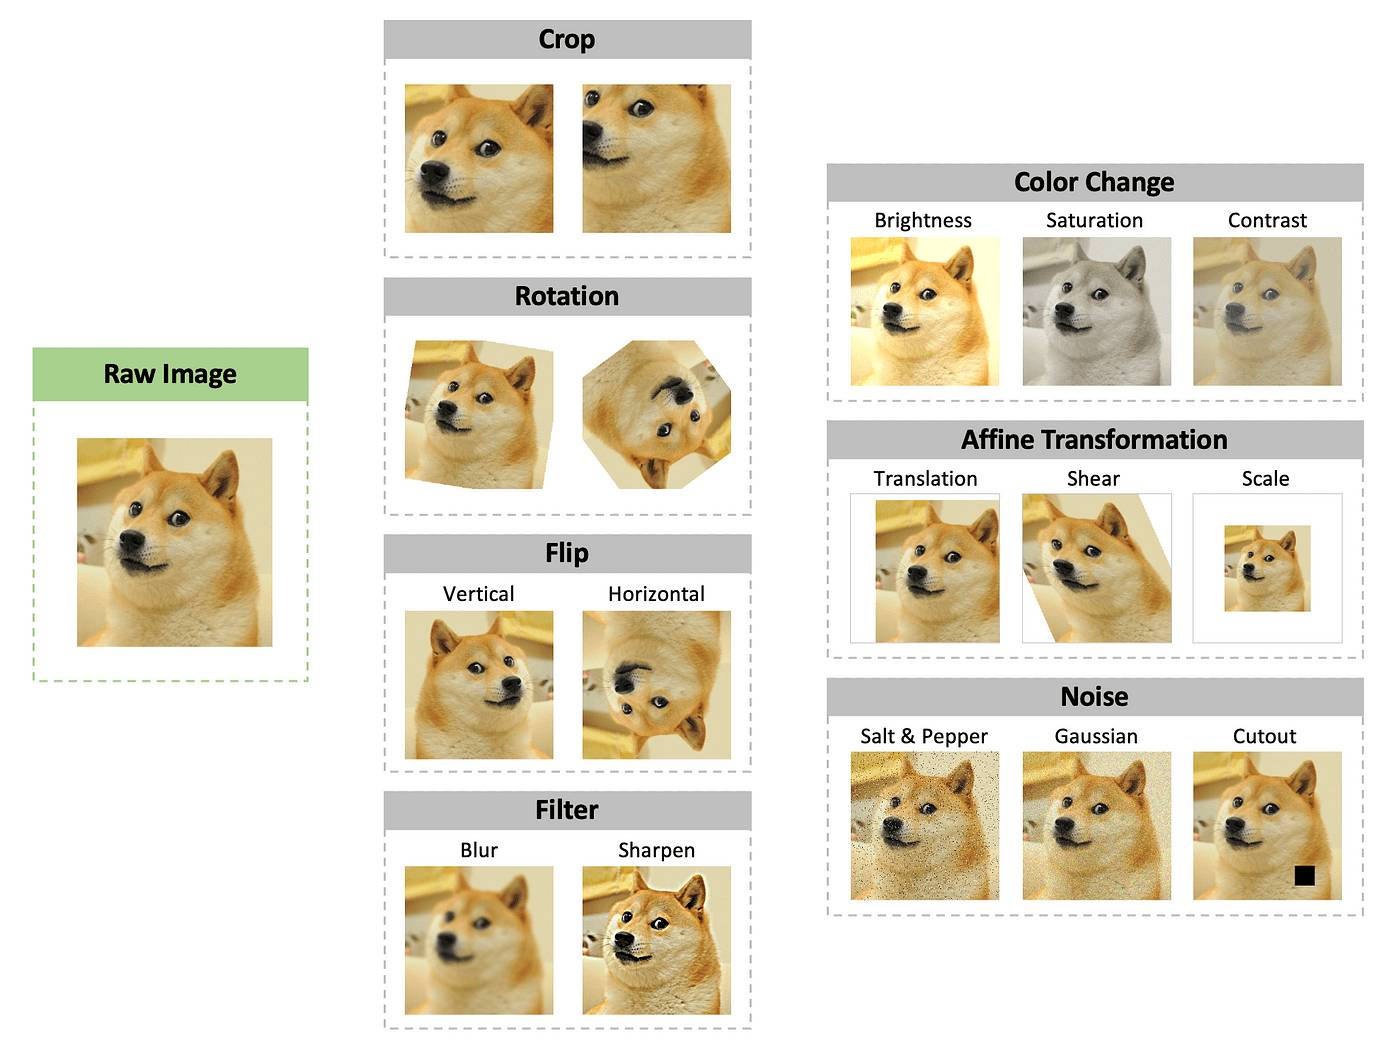 

In [46]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,     # zoom the image to 0.2 percent
                                    rotation_range=0.2, # ratation image 0.2 precent
                                    height_shift_range=0.2, # shifting height
                                    width_shift_range=0.2,  # shifting widht
                                    fill_mode="nearest",   # after pushing the pixel fill method fills the "nearest" nearest neighbor based on its value
                                    brightness_range=(0.2,0.5), # brightness
                                    horizontal_flip=True,  # horizontal flip
                                    vertical_flip=True  # vertical flip
                                   )

In [47]:
train_data_augmentatsiya = data_generator.flow_from_directory(train_data_dir, target_size=(224,224), class_mode="sparse")


Found 1582 images belonging to 10 classes.


In [48]:
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224))


Found 50 files belonging to 10 classes.


In [49]:
for image,label in test_data.take(1):
    for i in range(1):
        image = image[i].numpy().astype("uint8")

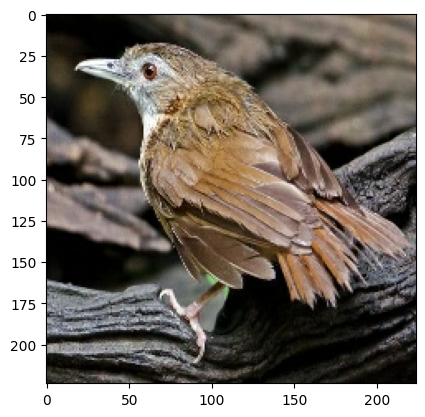

In [50]:
plt.imshow(image)

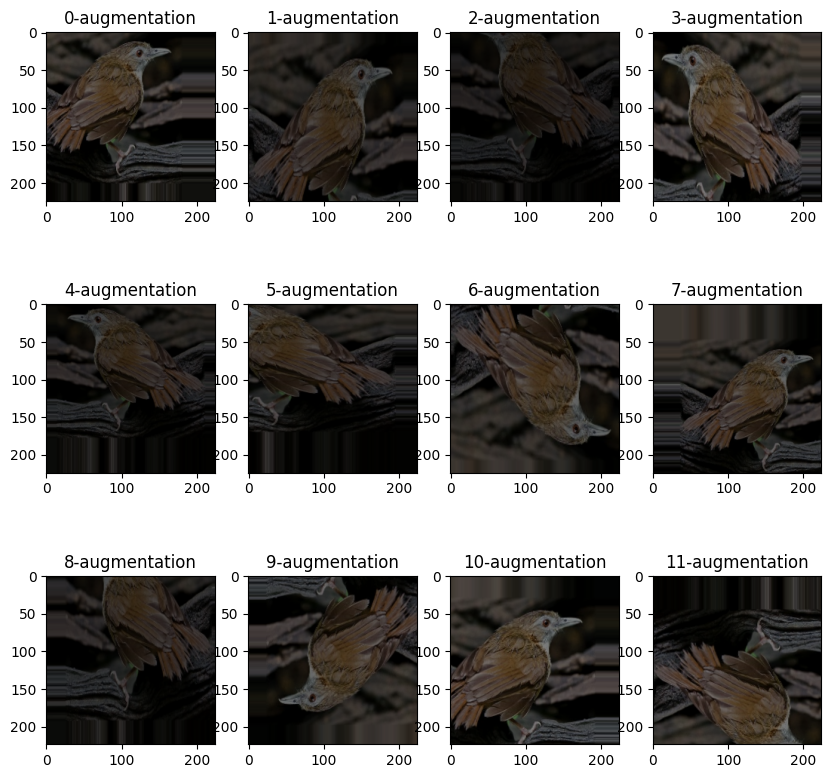

In [51]:
plt.figure(figsize=(10,10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(next(data_generator.flow(np.expand_dims(image,0)))[0])
    plt.title(f"{i}-augmentation")

# If we pay attention to the picture below, we can see the augmentations

In [52]:
model_with_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((224,224,3)),
    
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),   #112x112x32
    
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),   #56x56x64
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    
])

In [53]:
model_with_augmentation.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 200704)            0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [54]:
model_with_augmentation.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [55]:
with tf.device('/GPU:0'):
    model_with_augmentation.fit(train_data_augmentatsiya, epochs=10) 

Epoch 1/10
50/50 [==============================] - 23s 441ms/step - loss: 2.1406 - accuracy: 0.2314
Epoch 2/10
50/50 [==============================] - 16s 308ms/step - loss: 1.7160 - accuracy: 0.4033
Epoch 3/10
50/50 [==============================] - 15s 299ms/step - loss: 1.4820 - accuracy: 0.4741
Epoch 4/10
50/50 [==============================] - 15s 303ms/step - loss: 1.3507 - accuracy: 0.5215
Epoch 5/10
50/50 [==============================] - 15s 298ms/step - loss: 1.3339 - accuracy: 0.5322
Epoch 6/10
50/50 [==============================] - 15s 300ms/step - loss: 1.2174 - accuracy: 0.5860
Epoch 7/10
50/50 [==============================] - 15s 302ms/step - loss: 1.1877 - accuracy: 0.5942
Epoch 8/10
50/50 [==============================] - 15s 304ms/step - loss: 1.1190 - accuracy: 0.6068
Epoch 9/10
50/50 [==============================] - 15s 304ms/step - loss: 1.0470 - accuracy: 0.6473
Epoch 10/10
50/50 [==============================] - 16s 314ms/step - loss: 1.0111 - accura

In [56]:
model_with_augmentation.evaluate(test_data)

2/2 [==============================] - 1s 30ms/step - loss: 565.4774 - accuracy: 0.6000


[565.4774169921875, 0.6000000238418579]

### <center> If you pay attention, when we don't use augmentation, we got a very low result in the test, and when we use augmentation, we got the same result in the test as in the training process, which is good.

# <center> <h1> 👨‍💻   🚀  